1. Why Learn Calculus?
==

In the previous course, we explored the machine learning workflow using the k-nearest neighbors algorithm. We chose the k-nearest neighbors algorithm because building the intuition for how the algorithm works doesn't require any mathematics. While the algorithm is easy to grasp, we can't use it for larger datasets because the model itself is represented using the entire training set. Each time we want to make a prediction on a new observation, we need to calculate the distance between each observation in our training set and our new observation, then rank by ascending distance. This is a computationally intensive technique!

Moving forward, for most of the machine learning techniques we'll learn about next, the model is represented as a mathematical function. This mathematical function approximates the underlying function that describes how the features are related to the target attribute. Once we derive this mathematical function using the training dataset, making predictions on the test dataset (or on a future dataset) is computationally cheap. The following diagram shows 2 different linear regression functions that approximate the dataset (note that the values in this dataset are random).

<img width="900" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1oiu7joWXwdBFmizd3V2o1rRcmJvZQwib">



Before we can dive into using linear regression models for machine learning, we'll need to understand some key ideas from calculus. Calculus provides a framework for understanding how mathematical functions behave. Calculus helps us:

- understand the steepness at various points
- find the extreme points in a function
- determine the optimal function that best represents a dataset

Let's start by setting up a motivating problem, which we'll refer back to throughout this course. Let's say we're given the following equation, which describes the trajectory of a ball after it's kicked by a football player:

$$-(x^2)+3x-1$$

$x$ is time in seconds while y is the vertical position of the ball. Naturally, we'd like to know the highest position the ball reached and at what time that happened. While we can graph the equation and estimate the result visually, if we want the precise time and vertical position we'll need to use calculus. In this course, we'll explore the different calculus concepts necessary to build up to being able to find this precise point.

Let's start by visualizing this function.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**: 

- Use [numpy.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to generate a NumPy array containing 100 values from **0** to **3** and assign to **x**.
- Transform **x** by applying the function: $y=-(x^2)+3x-1$ assign the resulting array of transformed values to **y**.
- Use <span style="background-color: #F9EBEA; color:##C0392B">pyplot.plot()</span> to generate a line plot with **x** on the x-axis and **y** on the y-axis.
- Brainstorm how you would calculate the maximum height and find the exact time it occurred.

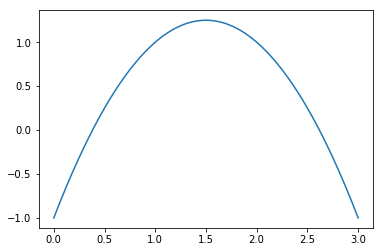

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 300)
y = -1*(x**2) + x*3 - 1
plt.plot(x,y)
plt.show()

2. Linear Function
==

Before we dive into analyzing the curve of a ball's height, we'll need to understand a few key ideas first. We'll explore those concepts using simple, straight lines first then build up to applying those concepts to curves. A simple, straight line is more clearly defined as a linear function. All linear functions can be written in the following form:

$y=mx+b$

For a specific linear function, m and b are constant values while $x$ and $y$ are variables. 
$y=3x+1$ and $y=5$ are both examples of linear function.

Let's focus on the function $y=3x+1$ for now. This function multiples any $x$ value we pass in by 3 then adds 1 to it.

| x  | y   |
|----|-----|
| -5 | -14 |
| -4 | -11 |
| -3 | -8  |
| -2 | -5  |
| -1 | -2  |
| 0  | 1   |
| 1  | 4   |
| 2  | 7   |
| 3  | 10  |
| 4  | 13  |
| 5  | 16  |

Let's start by gaining a geometric understanding of linear functions. Use the widget below to play around with different values of m and b.

- How does the line change when you keep m fixed but vary b?
- How does the line change when you keep b fixed but vary m?
- Which value controls the steepness of the line?
- What happens to the line when m is set to 0?

In [3]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [4]:
x = np.linspace(-3, 3, 100)
y = 3*x + 2

In [5]:
# Let's say we're given the following equation, 
# which describes the trajectory of a ball after it's kicked by a football player:
p = figure(title="Trajectory of a ball", 
           plot_height=300, plot_width=600,
           y_range=(-5,5), x_range=(-5,5))
r = p.line(x, y, color="blue", line_width=3)

In [6]:
def update(m,b):
    r.data_source.data['y'] = m*x + b
    push_notebook()

In [7]:
show(p, notebook_handle=True)

In [8]:
interact(update, m=(1,10), b=(-5,5))


A Jupyter Widget

<function __main__.update>

In [11]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = np.linspace(-3, 3, 100)
y = 3*x + 2

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(title="Trajectory of a ball", 
           plot_height=300, plot_width=600,
             y_range=(-5,5), x_range=(-5,5))
           
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

update_curve = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var m = slider_m.value;
    var b = slider_b.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = m*x[i] + b;
    }
    source.change.emit();
""")


slider_m = Slider(start=-3.0, end=6, value=1, step=.1, 
                  title="m", callback=update_curve)
update_curve.args["slider_m"] = slider_m

slider_b = Slider(start=-3.0, end=6, value=1, step=.1, 
                  title="b",callback=update_curve)
update_curve.args["slider_b"] = slider_b


show(column(slider_m, slider_b, plot))

3. Slope and y-intercept
==

From the previous step, we can tell that the constant $m$ determines how steep the line is. When $m$ is equal to **0**, the line is completely flat and is parallel to the **x-axis**. If When $m$ and $b$ are both set to **0**, the line is equivalent to the **x-axis**.

The $m$ value controls a line's slope while the $b$ value controls a line's y-intercept. We'll break down both of these terms further. The y-intercept is the value where the line intersects the **y-axis**. When you fixed m from the last step but varied $b$, you may have noticed that the point at which the line intersected the **y-axis** varied. The line intersects the **y-axis** when $x$ is **0**. For **y=3x+1**, the y-intercept is **1**:

$f(0)=3(0)+1=1$

While the y-intercept describes where a line intersects the y-axis, the slope describes the steepness of the line. From the last step, the whenever we set $m$ to a positive value, the $y$ values increased as the $x$ values increased. Whenever we set $m$ to a negative value, the $y$ values decreased as the $x$ values increased. When $m$ was **0**, the **y** value was consistent throughout (and equivalent to the y-intercept).

Another way to think about slope is rate of change. The rate of change is how much the **y** axis changes for a specific change in the **x** axis.

$\displaystyle m=\frac{change \ in \ y}{change \ in \ x}=\frac{\Delta y}{\Delta x}$

Here's the slope calculation between the points (1,4) and (4,13), which are both points on the line $y=3x+1$:

$\displaystyle m=\frac{change \ in \ y}{change \ in \ x}=\frac{13-4}{4-1} = 3$

When referring to unique $x$ and $y$ coordinates, an integer value is usually added to the subscripts. For example, the points (1,4) and (4,13) from the last calculation can be referred to as ($x_1,y_1$) and ($x_2,y_2$). If we don't specify what ($x_1,y_1$) and ($x_2,y_2$) are, they act as variables. We'll emphasize this further in the widget for this step and when we dive more into the calculations in the next step.

By default, the following widget contains a visualization of $y=3x+1$ with the coordinate (5,16) emphasized. Try varying the $x_1$ and $x_2$ values and observing the visualization of the rate of change. Both of the coordinates ($x_1,y_1$) and ($y_1,y_2$) are emphasized on the line. The calculation for the rate of change is also shown in the title of the plot. You'll notice that no matter what the coordinates are, the rate of change between them is always **3**.




4. Math Behind Slope
==

If we calculate the rate of change between any points on a line, it will always equal the function's slope. Let's show this for the more general case. In the following math block, ($x_1,y_1$) and ($x_2,y_2$) represent any **2** coordinates on a line:

$$y_1=mx_1+b$$


We can subtract both of these equations to get:

$$y_1-y_2 = mx_1 - mx_2+b-b$$

$$y_1 - y_2 = m(x_1 - x_2)$$

$$m=\frac{y_1 - y_2}{x_1-x_2}$$

While $y_1 - y_2$ represents $\Delta y$, $x_1 - x_2$ represents $\Delta x$. Let's now calculate the slope for a few more points that lie on $y=3x+1$.



5. Nonlinear function
==

So far, we've been working with linear functions, where we can determine the slope of the function from the equation itself. If we step back to our ball trajectory equation, however, you'll notice that it doesn't match the form $y=mx+b$:

$$-(x^2) + 3x -1 $$


This is because this function is a **nonlinear function**. Nonlinear functions don't represent straight lines -- they represent curves like the one we plotted in the first step of this mission. The outputs **y** of a nonlinear function are not proportional to the input values **x**. An increment in **x** doesn't result in a constant increment in **y**.

Whenever **x** is raised to a power not equal to **1**, we have a non-linear function. Here are some more examples of nonlinear functions:

$$y=x^3$$

$$y=x^3+3x^2+2x-1$$

$$y=\frac{1}{-x^2}$$

$$y=\sqrt{x}$$

In the following widget, try varying the $x_1$ and $x_2$ values and observe how the slope changes throughout.

6. Secant Lines
==

As you varied $x_1$ and $x_2$, the slope between the **2** points varied drastically. Because straight, linear functions have a constant slope throughout, we know the slope at any point on the line. If we knew that the relationship between temperature and wind speed was linear, we could predict what the wind speed would be at any temperature by sampling two points and calculating the slope.

If the relationship was nonlinear instead, we can't predict what the wind speed would be at any particular temperature just by sampling **2** points and using the slope between them (because the slope changes drastically depending on which **2** points you pick). When we calculate the slope between **2** points on a curve, we're really calculating the slope between the line that intersects both of those points.

If you recall, the equation for a linear function is $y=mx+b$. If we know the values for **m**, **x**, and **y**, we can calculate **b**, the y-intercept, using some arithmetic. Let's walk through the calculation for the line connecting the points at the **x** values **0** and **1**.

First, we state what we know.

$$y=-(x^2)+3x-1$$

$$x_1 = 0$$

$$x_2 = 1$$

We use $y=-(x^2)+3x-1$ to calculate $y_1$ and $y_2$.

$$y_1 = 0+ 0-1 = -1$$

$$y_2=-1+3-1 =1$$


We use the ($x,y$) coordinates to solve for the slope.

$$m=\frac{y_2 - y_1}{x_2 - x_1} = 2$$


Because both ($x_1,y_1$) and ($x_2,y_2$) are points on the line connecting both points, we can use either one to calculate the y-intercept value ($b$).

$$y_1 = m x_1 + b$$

$$-1 = 2(0) + b$$

$$b

$b=−1$


Finally, we can use the slope and the y-intercept to declare the equation for the line connecting both points:

$y=2x−1$

A line that intersects **2** points on a curve is known as a **secant line**. Let's practice creating some secant lines for our curve. We've started writing the function **draw_secant()** for you already, which right now just plots our nonlinear function between the x-values -20 and 30.

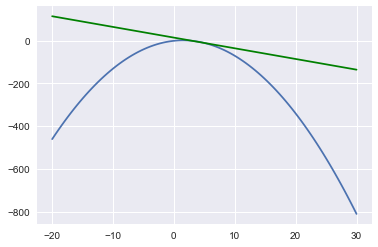

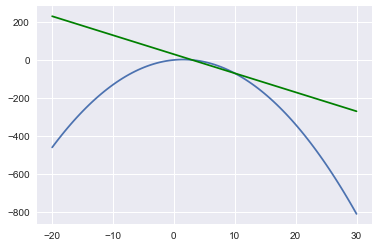

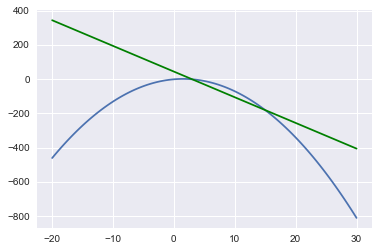

In [12]:
import seaborn
seaborn.set(style='darkgrid')

def draw_secant(x_values):
    x = np.linspace(-20,30,100)
    y = -1*(x**2) + x*3 - 1
    plt.plot(x,y)
    
    x_0 = x_values[0]
    x_1 = x_values[1]
    y_0 = -1*(x_0**2) + x_0*3 - 1
    y_1 = -1*(x_1**2) + x_1*3 - 1
    m = (y_1 - y_0) / (x_1 - x_0)
    b = y_1 - m*x_1
    
    y_secant = x*m + b
    plt.plot(x, y_secant, c='green')
    plt.show()
draw_secant([3,5])
draw_secant([3,10])
draw_secant([3,15])

In [23]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = np.linspace(-20,30,100)
y = -1*(x**2) + x*3 - 1

x_0 = 3
x_1 = 5
y_0 = -1*(x_0**2) + x_0*3 - 1
y_1 = -1*(x_1**2) + x_1*3 - 1
m = (y_1 - y_0) / (x_1 - x_0)
b = y_1 - m*x_1
y_secant = x*m + b

source = ColumnDataSource(data=dict(x=x, y=y))
source_secant = ColumnDataSource(data=dict(x=x, y=y_secant))

plot = figure(title="Trajectory of a ball", 
           plot_height=300, plot_width=600,
             y_range=(-800,400), x_range=(-20,30))

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
plot.line('x', 'y', source=source_secant, line_width=3, line_alpha=0.6)


update_curve = CustomJS(args=dict(source=source_secant), code="""
    var data = source.data;
    x = data['x']
    y = data['y']
    x_0 = slider1.value;
    x_1 = slider2.value;
    y_0 = -1*(x_0**2) + x_0*3 - 1
    y_1 = -1*(x_1**2) + x_1*3 - 1
    m = (y_1 - y_0) / (x_1 - x_0)
    b = y_1 - m*x_1
    for (i = 0; i < x.length; i++) {
       y[i] = x[i]*m + b
    }
    source.change.emit();
""")


slider1 = Slider(start=-30.0, end=10, value=1, step=.1, 
                  title="X1", callback=update_curve)
update_curve.args["slider1"] = slider1

slider2 = Slider(start=-30.0, end=10, value=3, step=.1, 
                  title="X2",callback=update_curve)
update_curve.args["slider2"] = slider2


show(column(slider1, slider2, plot))

show(plot)



In the last step, we drew secant lines between the fixed $x_1$ value and increasingly larger $x_2$ values. When the gap between $x_1$ and $x_2$ was small, the secant line intersected comfortably with our curve. As we increased the gap between the **2** x-values, the secant line started to diverge from our curve. This observation is critical to understanding how slope works for curves.

The slope of a curve at a specific point, $x_1$ is best understood as slope of the secant line at increasingly smaller intervals of [$x_1,x_2$]. The smaller the difference between $x_1$ and $x_2$, the more precise the secant line approximates the slope at that point on our curve.

What happens when $x_1$ and $x_2$ are the same?

This line is known as the **tangent**, and, unlike the secant line, it only intersects our function at one point. So far, we've been working with secant lines that connect **2** points that are increasingly close together. You can think of the tangent line as the secant line when both points are the same.